In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
use_cols = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv("https://github.com/krishnaik06/Movie-Recommender-in-python/blob/master/u.data?raw=true",sep = '\t', names = use_cols)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles= pd.read_csv("https://github.com/krishnaik06/Movie-Recommender-in-python/raw/master/Movie_Id_Titles")

In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
movie_titles.shape

(1682, 2)

In [7]:
df.shape

(100003, 4)

In [8]:
#Now we merge above dataframe on item_id column.
df = pd.merge(df, movie_titles, on = 'item_id')

In [9]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [10]:
df.shape

(100003, 5)

In [11]:
#now we create dataframe with average ratings and number of ratings w.r.t. each movies.
average_rating = df.groupby('title')['rating'].mean().sort_values(ascending = False)

In [12]:
average_rating.head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [13]:
count_rating = df.groupby('title')['rating'].count().sort_values(ascending = False)

In [14]:
count_rating

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [15]:
ratings = pd.merge(average_rating, count_rating, on  = 'title')

In [16]:
ratings.head()

,rating_x,rating_y
title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1


In [17]:
ratings.rename(columns = {"rating_x": "rating", "rating_y": "number_ratings"}, inplace = True)

In [18]:
ratings.head()

,rating,number_ratings
title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1


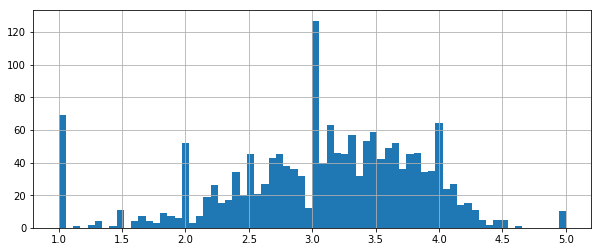

In [19]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

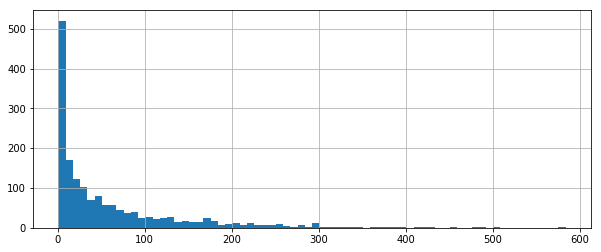

In [20]:
plt.figure(figsize = (10,4))
ratings['number_ratings'].hist(bins = 70)

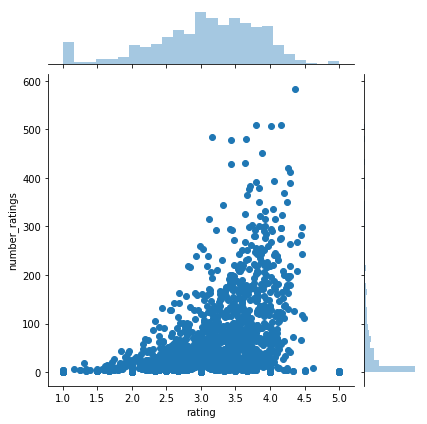

In [21]:
sns.jointplot(x = 'rating', y = 'number_ratings', data = ratings)

In [22]:
#Recommander Similar Movies

In [23]:
moviesmat = df.pivot_table(index = 'user_id', columns = 'title', values= 'rating')

In [24]:
moviesmat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ratings.sort_values('number_ratings', ascending = False).head(10)

,rating,number_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [26]:
#now we choose any one movie 'Star Wars (1977)'
starwar_user_rating = moviesmat['Star Wars (1977)']

In [27]:
starwar_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [28]:
similar_to_starwars = moviesmat.corrwith(starwar_user_rating)

In [29]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [30]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlations'])

In [31]:
corr_starwars.dropna(inplace = True)

In [32]:
corr_starwars.head()

,Correlations
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [33]:
corr_starwars.sort_values('Correlations', ascending= False).head(10)

,Correlations
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [34]:
corr_starwars = corr_starwars.join(ratings['number_ratings'])

In [35]:
corr_starwars.head()

,Correlations,number_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [36]:
corr_starwars[corr_starwars['number_ratings'] > 100].sort_values('Correlations', ascending = False).head()

,Correlations,number_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [37]:
#now we select movie Liar Liar (1997)
liarliar_use_ratings = moviesmat['Liar Liar (1997)']

In [38]:
liarliar_use_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [39]:
similar_to_liarliar = moviesmat.corrwith(moviesmat['Liar Liar (1997)'])

In [40]:
similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [41]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])

In [42]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [43]:
corr_liarliar.dropna(inplace = True)

In [44]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [45]:
corr_liarliar = corr_liarliar.join(ratings['number_ratings'])

In [46]:
corr_liarliar.head()

,Correlation,number_ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [48]:
corr_liarliar[corr_liarliar['number_ratings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,number_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
